# Problem-TELECOM CHURN ANALYSIS

# DESCRIPTION:

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## now lets solve the problem using machine learning algorithm


# steps involved:

1. Problem Formulation
2. Gather the data
3. data Preprocessing
4. split the data
5. select and train model
6. evaluation
7. hyper parameter tuning
8. final model

# lets do the first and second steps now

In [1]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
## lets she the shape
print("The shape of dataframe is {}".format(data.shape))

The shape of dataframe is (7043, 21)


In [5]:
## lets get a quick info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
##lets check for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
def convertToFloat(x):
    y= 0
    try:
        y= float(x)
    except:
        pass
    return y

In [8]:
data['TotalCharges'] = data.TotalCharges.apply(convertToFloat)

In [9]:
data["TotalCharges"].isnull().sum()

0

In [10]:
data = data.drop(["customerID"],axis=1)


##  so we can see that there are no null values in the dataframe
 

In [11]:
##lets see the numerical and categorical features in our dataframe
numerical_features = [feature for feature in data.columns if data[feature].dtype!="O"]
print(numerical_features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
categorical_features = [feature for feature in data.columns if data[feature].dtype=="O"]
print(categorical_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
print(len(numerical_features))
print(len(categorical_features))

4
16


In [14]:
for value in numerical_features:
    print("the number of unique values in {} is {}".format(value,data[value].nunique()))

the number of unique values in SeniorCitizen is 2
the number of unique values in tenure is 73
the number of unique values in MonthlyCharges is 1585
the number of unique values in TotalCharges is 6531


# now lets perform explorative data analysis

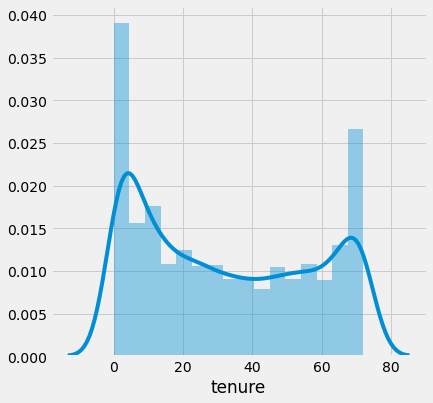

In [104]:
plt.figure(figsize=[6,6])
sn.distplot(data[numerical_features[1]],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,)
plt.show()

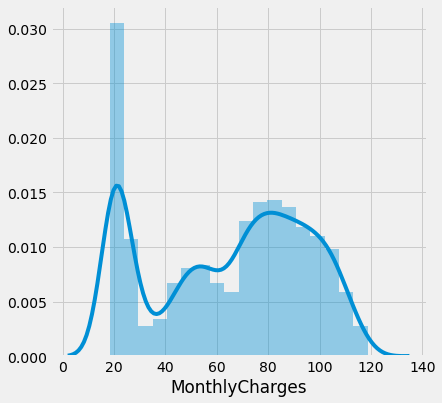

In [105]:
plt.figure(figsize=[6,6])
sn.distplot(data[numerical_features[2]],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,)
plt.show()

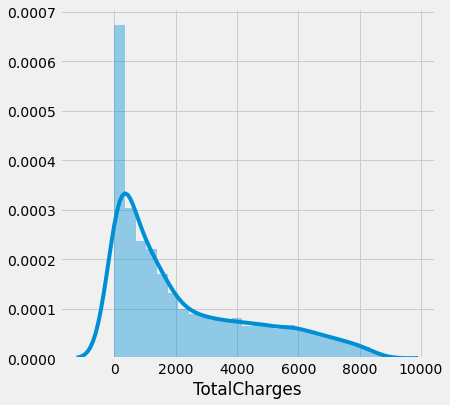

In [106]:
plt.figure(figsize=[6,6])
sn.distplot(data[numerical_features[3]],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,)
plt.show()

# we can clearly see that that our numerical features are not normally distributed lets get back to them after some time

In [18]:
#now lets perform some eda on categorical values
print(categorical_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [19]:
data["Churn"] = np.where(data["Churn"]=="Yes",1,0)

In [20]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [21]:
x = data.groupby(['gender'])['Churn'].count().values
y_axis = list(x)
y = data[categorical_features[len(categorical_features)-1]].unique()
x_axis=list(y)

-0.4 0
0.6 0


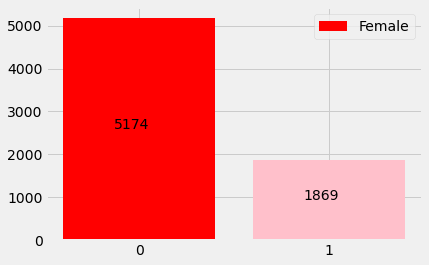

In [107]:
ypos = np.arange(len(x_axis))
plt.xticks(ypos,x_axis)
a = plt.bar(ypos,y_axis,color=["red","pink"])
for i in a:
    print(i.get_x(),i.get_y())
    plt.text(i.get_x() + (i.get_width()/3),i.get_y() + (i.get_height()/2),i.get_height())
plt.legend(["Female","Male"])

In [23]:
x = data.groupby(['gender'])['Churn'].count()
x

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

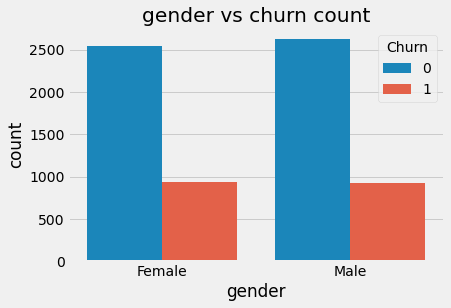

In [108]:
#lets see the count of males and females
a = sn.countplot(categorical_features[0],
    y=None,
    hue="Churn",
    data=data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True)
plt.xlabel("gender")
plt.title("gender vs churn count")
plt.show()

In [25]:
x = data.groupby([categorical_features[1]])['Churn'].count().values
y_axis = list(x)
y = data[categorical_features[len(categorical_features)-1]].unique()
x_axis=list(y)

-0.4 0
0.6 0


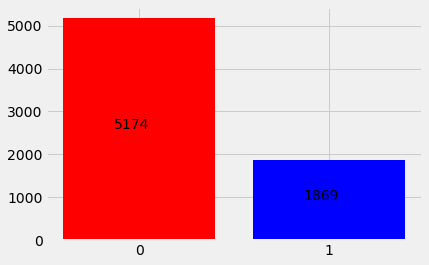

In [109]:
ypos = np.arange(len(x_axis))
plt.xticks(ypos,x_axis)
a = plt.bar(ypos,y_axis,color=["red","blue"])
for i in a:
    print(i.get_x(),i.get_y())
    plt.text(i.get_x() + (i.get_width()/3),i.get_y() + (i.get_height()/2),i.get_height())
plt.show()

In [27]:
x = data.groupby([categorical_features[1]])['Churn'].count()
x

Partner
No     3641
Yes    3402
Name: Churn, dtype: int64

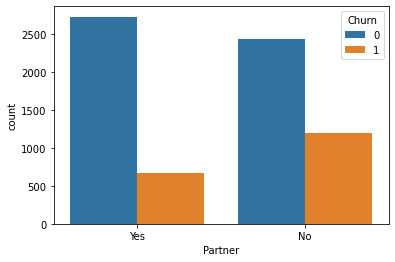

In [28]:
a = sn.countplot(categorical_features[1],
    y=None,
    hue="Churn",
    data=data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True)
plt.xlabel(categorical_features[1])
plt.show()

In [29]:
x = data.groupby(["Churn"])[categorical_features[2]].count().values
y_axis = list(x)
y = data[categorical_features[len(categorical_features)-1]].unique()
x_axis=list(y)

-0.4 0
0.6 0


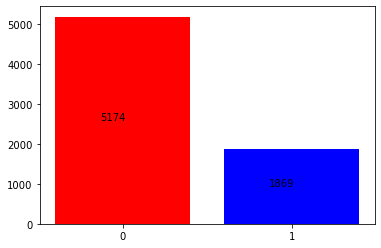

In [30]:
ypos = np.arange(len(x_axis))
plt.xticks(ypos,x_axis)
a = plt.bar(ypos,y_axis,color=["red","blue"])
for i in a:
    print(i.get_x(),i.get_y())
    plt.text(i.get_x() + (i.get_width()/3),i.get_y() + (i.get_height()/2),i.get_height())
plt.show()

In [31]:
x = data.groupby('Churn')[categorical_features[2]].count()
print(categorical_features[2])
x


Dependents


Churn
0    5174
1    1869
Name: Dependents, dtype: int64

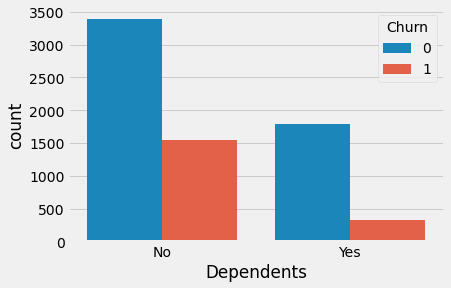

In [103]:
a = sn.countplot(categorical_features[2],
    y=None,
    hue="Churn",
    data=data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True)
plt.xlabel(categorical_features[2])
plt.show()

-0.4 0
0.6 0


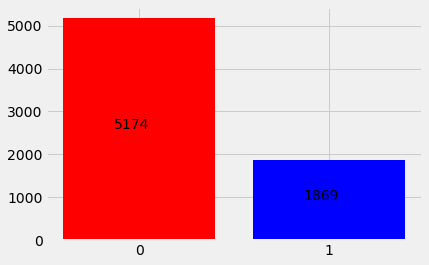

In [102]:
x = data.groupby(["Churn"])[categorical_features[3]].count().values
y_axis = list(x)
y = data[categorical_features[len(categorical_features)-1]].unique()
x_axis=list(y)
ypos = np.arange(len(x_axis))
plt.xticks(ypos,x_axis)
a = plt.bar(ypos,y_axis,color=["red","blue"])
for i in a:
    print(i.get_x(),i.get_y())
    plt.text(i.get_x() + (i.get_width()/3),i.get_y() + (i.get_height()/2),i.get_height())
plt.show()

In [34]:
x = data.groupby('Churn')[categorical_features[3]].count()
print(categorical_features[3])
x

PhoneService


Churn
0    5174
1    1869
Name: PhoneService, dtype: int64

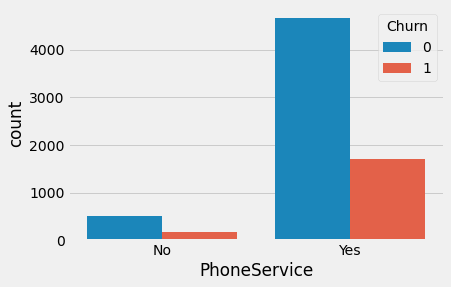

In [101]:
a = sn.countplot(categorical_features[3],
    y=None,
    hue="Churn",
    data=data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True)
plt.xlabel(categorical_features[3])
plt.show()

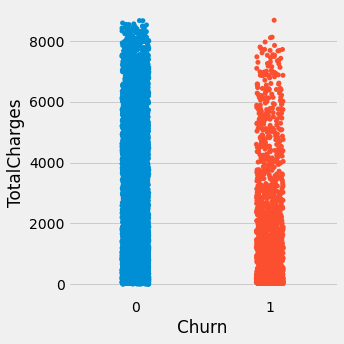

In [100]:
sn.catplot(x='Churn',
    y="TotalCharges",
    hue=None,
    data=data,
    row=None,
    col=None,
    col_wrap=None,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=5,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None)

-0.4 0
0.6 0


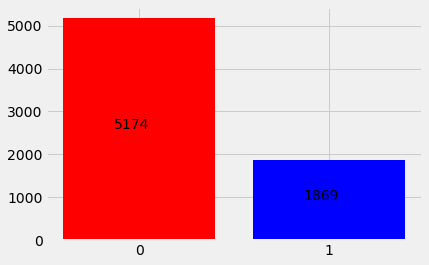

In [99]:
x = data.groupby(["Churn"])[categorical_features[4]].count().values
y_axis = list(x)
y = data[categorical_features[len(categorical_features)-1]].unique()
x_axis=list(y)
ypos = np.arange(len(x_axis))
plt.xticks(ypos,x_axis)
a = plt.bar(ypos,y_axis,color=["red","blue"])
for i in a:
    print(i.get_x(),i.get_y())
    plt.text(i.get_x() + (i.get_width()/3),i.get_y() + (i.get_height()/2),i.get_height())
plt.show()

In [38]:
x = data.groupby(["Churn"])[categorical_features[4]].count()
print(categorical_features[4])
x

MultipleLines


Churn
0    5174
1    1869
Name: MultipleLines, dtype: int64

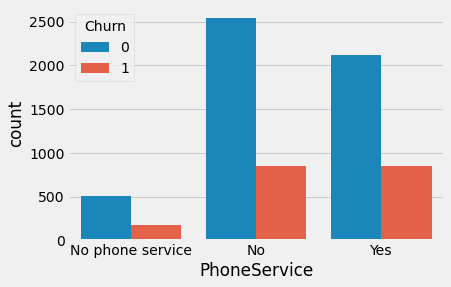

In [98]:
a = sn.countplot(categorical_features[4],
    y=None,
    hue="Churn",
    data=data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True)
plt.xlabel(categorical_features[3])
plt.show()

In [40]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [41]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

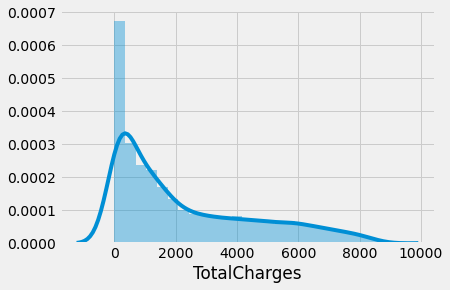

In [97]:
sn.distplot(data["TotalCharges"])

# lets start data preprocessing

In [43]:
data[categorical_features]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [44]:
for i in categorical_features:
    if data[i].nunique()>3:
        print(i)

PaymentMethod


## from this we can conclude that all the categorical features are nominal

In [45]:
print(numerical_features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [46]:
numerical_data = data[numerical_features]
numerical_data["Churn"] = data["Churn"]
numerical_data.head()

<ipython-input-46-3498f1b24dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data["Churn"] = data["Churn"]


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


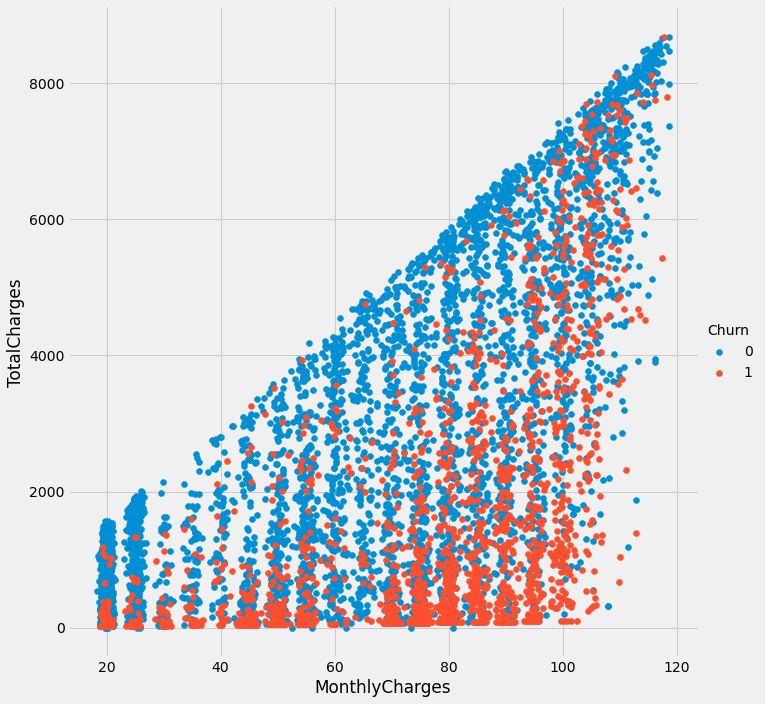

In [96]:
sn.FacetGrid(numerical_data,
    row=None,
    col=None,
    hue="Churn",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=10).map(plt.scatter,"MonthlyCharges","TotalCharges").add_legend()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


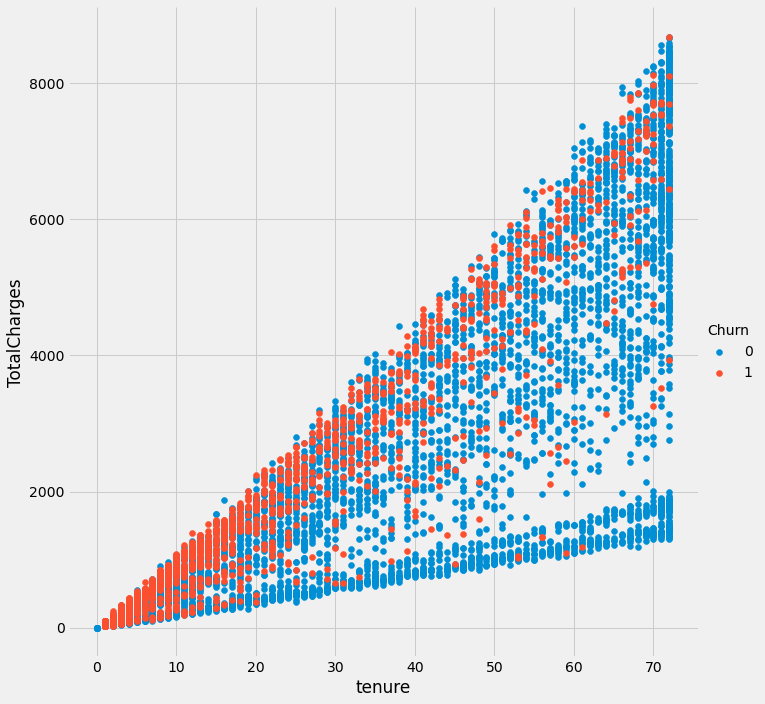

In [94]:
sn.FacetGrid(numerical_data,
    row=None,
    col=None,
    hue="Churn",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=10).map(plt.scatter,"tenure","TotalCharges").add_legend()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


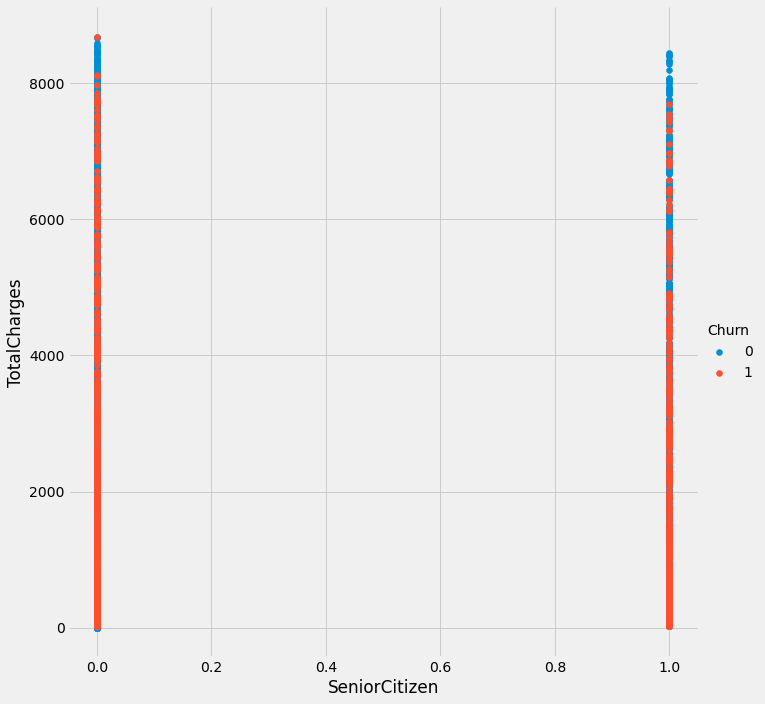

In [95]:
sn.FacetGrid(numerical_data,
    row=None,
    col=None,
    hue="Churn",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=10).map(plt.scatter,"SeniorCitizen","TotalCharges").add_legend()

In [50]:
data1 = pd.get_dummies(data,drop_first=True)
data1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [51]:
print(data1.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [52]:
print(numerical_features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# now lets check for outliers

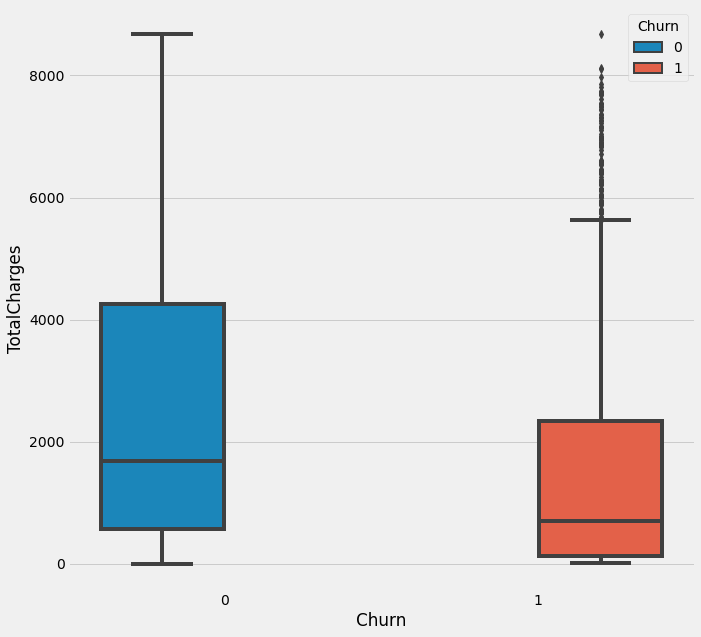

In [93]:
plt.figure(figsize=[10,10])
sn.boxplot( x="Churn",
    y='TotalCharges',
    hue="Churn",
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5)
plt.show()

# we can clearly observe that total charges above 6000 and having having churn=1 are outliers

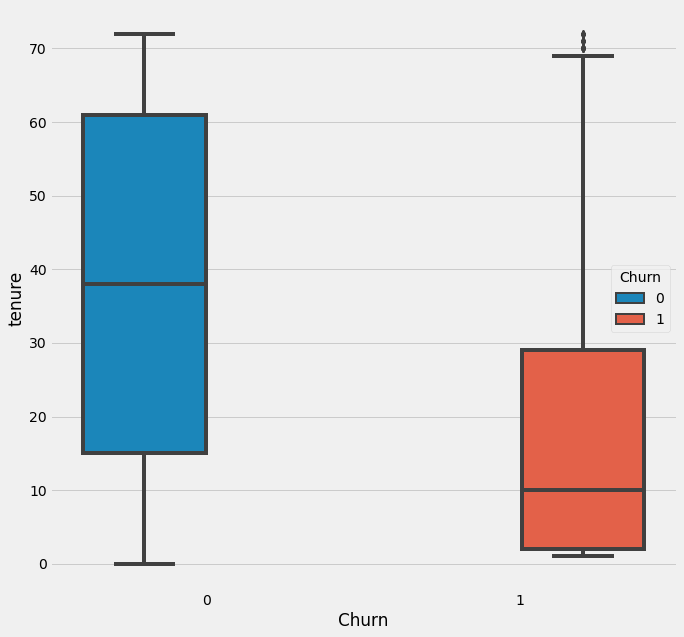

In [92]:
plt.figure(figsize=[10,10])
sn.boxplot( x="Churn",
    y='tenure',
    hue="Churn",
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5)
plt.show()

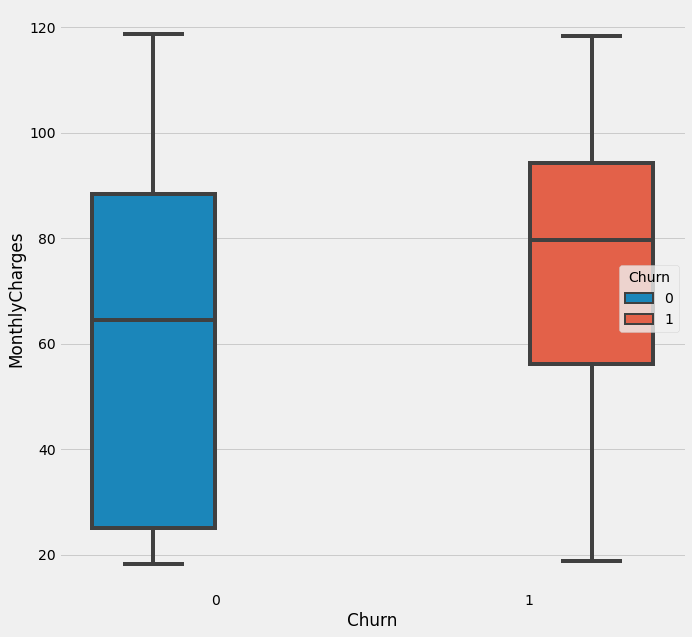

In [91]:
plt.figure(figsize=[10,10])
sn.boxplot( x="Churn",
    y='MonthlyCharges',
    hue="Churn",
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5)
plt.show()

In [56]:
outliers = data1[(data1['TotalCharges']>6000) & (data1['Churn']==1)]
outliers

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
104,0,68,110.00,7611.85,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0
339,0,63,103.40,6603.00,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
402,0,69,99.45,7007.60,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
445,0,60,105.90,6396.45,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
609,1,65,105.25,6786.40,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,0,61,111.60,6876.05,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0
6853,0,54,111.10,6014.85,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
6945,0,70,98.30,6859.50,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
6972,1,56,111.95,6418.90,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0


In [57]:
data1[(data1['TotalCharges']>6000) & (data1['Churn']==1)].size

2728

In [58]:
data1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [59]:
def convert(x,y):
  z=0
  if x > 6000:
    if y == 1:
      z = 1395
    else:
      z = x
  else:
    z = x
  return z

In [60]:
data1["new_total"] = data1.apply(lambda x:convert(x.TotalCharges,x.Churn),axis=1)

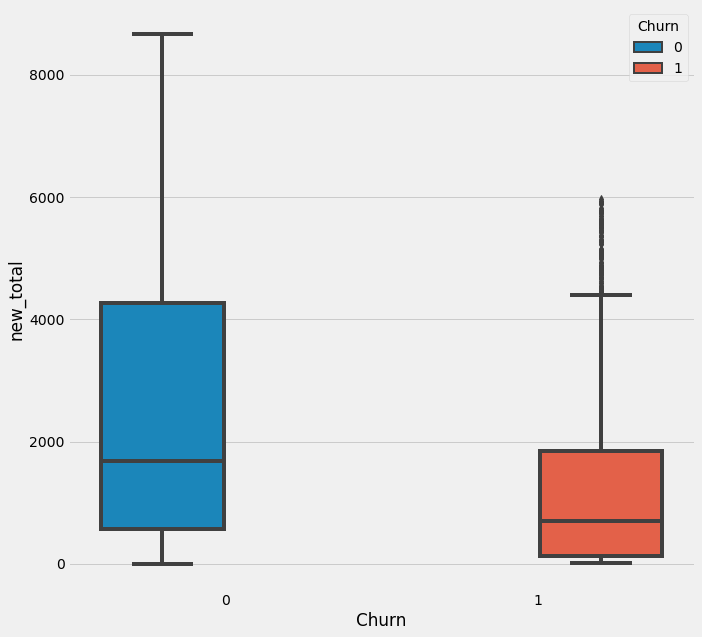

In [90]:
plt.figure(figsize=[10,10])
sn.boxplot( x="Churn",
    y='new_total',
    hue="Churn",
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5)
plt.show()

In [62]:
data2 = data1.copy()
data2 = data2.drop("Churn",axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data3 = pd.DataFrame(scale.fit_transform(data2),columns=data2.columns)
data3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,new_total
0,-0.439916,-1.277445,-1.160323,-0.992611,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-0.988082
1,-0.439916,0.066327,-0.259629,-0.172165,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,-0.145722
2,-0.439916,-1.236724,-0.362660,-0.958066,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,-0.952615
3,-0.439916,0.514251,-0.746535,-0.193672,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,-0.167804
4,-0.439916,-1.236724,0.197365,-0.938874,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-0.932911


In [64]:
data3["Churn"] = data1["Churn"]
data3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,new_total,Churn
0,-0.439916,-1.277445,-1.160323,-0.992611,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-0.988082,0
1,-0.439916,0.066327,-0.259629,-0.172165,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,-0.145722,0
2,-0.439916,-1.236724,-0.362660,-0.958066,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,-0.952615,1
3,-0.439916,0.514251,-0.746535,-0.193672,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,-0.167804,0
4,-0.439916,-1.236724,0.197365,-0.938874,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-0.932911,1


# now lets split our dataset into dependent and independent datasets

In [65]:
independent = data3.drop("Churn",axis=1)
dependent = data3["Churn"]
print("the indepenent features in dataset are {}".format(independent.shape))
print("the dependent features in dataset are {}".format(dependent.shape))

the indepenent features in dataset are (7043, 31)
the dependent features in dataset are (7043,)


# lets split into train and test datasets

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.25,random_state=10)

In [67]:
print("size of x_train is {}".format(x_train.shape))
print("size of x_test is {}".format(x_test.shape))
print("size of y_train is {}".format(y_train.shape))
print("size of y_test is {}".format(y_test.shape))

size of x_train is (5282, 31)
size of x_test is (1761, 31)
size of y_train is (5282,)
size of y_test is (1761,)


# Balanced and imbalanced datasets:
## 1.inorder to apply classification algorithms firstly we have to check whether our dependent feature is balanced or imbalanced

## 2. balanced means having equla instances of classes mostly and unbalanced means unequal instances of classes

# lests check our dataset

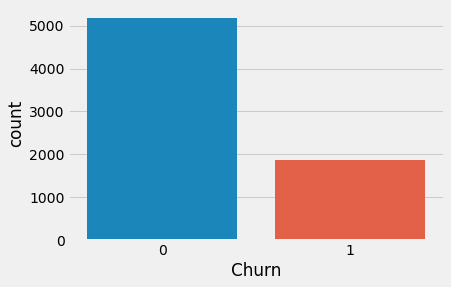

In [89]:
a = sn.countplot(dependent)

## its not a imbalnced dataset as they are not completely biases

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=300,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None)
model.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [70]:
model.score(x_train,y_train)

0.8205225293449451

In [71]:
model.score(x_test,y_test)

0.8143100511073254

## Hyperparameter tuning:it is technique in which we try different values for our parametres inorder to obtain a good accuracy to our models

In [78]:
values = []
train_predictions = []
test_predictions = []
for i in range(1,20):
    model1 = LogisticRegression(C=i)
    model1.fit(x_train,y_train)
    train_predictions.append(model1.score(x_train,y_train))
    test_predictions.append(model1.score(x_test,y_test))
    values.append(i)

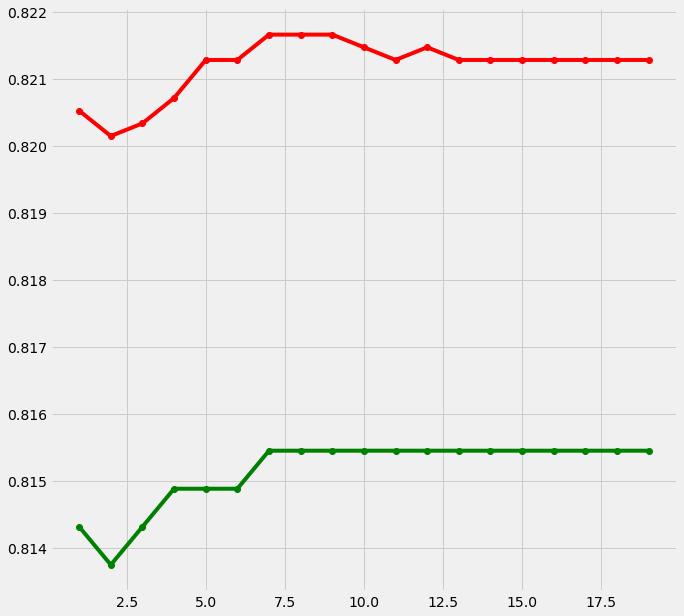

In [88]:
plt.figure(figsize=[10,10])
plt.plot(values,train_predictions,color="red",marker="o")
plt.plot(values,test_predictions,color="green",marker="o")

## so we can clearly see that we cannot see any change in accuracy now lets try with decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0) 
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
print("the score on training dataset is {}".format(model2.score(x_train,y_train)))
print("the score on training dataset is {}".format(model2.score(x_test,y_test)))

the score on training dataset is 0.9979174555092768
the score on training dataset is 0.7518455423055083


# now we can clearly see that our model is overfitted

* overfitting is nothing but having low bais and high variance that is the model tries to overfit the training data but fails with new training data by producing high variance

## now lets perform some hyper parameter tuning to make our model generalized

In [82]:
values1 = []
train_predictions1 = []
test_predictions1 = []
for i in range(2,30):
    model2 = DecisionTreeClassifier(max_depth=i,min_samples_split=i,min_samples_leaf=i)
    model2.fit(x_train,y_train)
    train_predictions1.append(model2.score(x_train,y_train))
    test_predictions1.append(model2.score(x_test,y_test))
    values1.append(i)

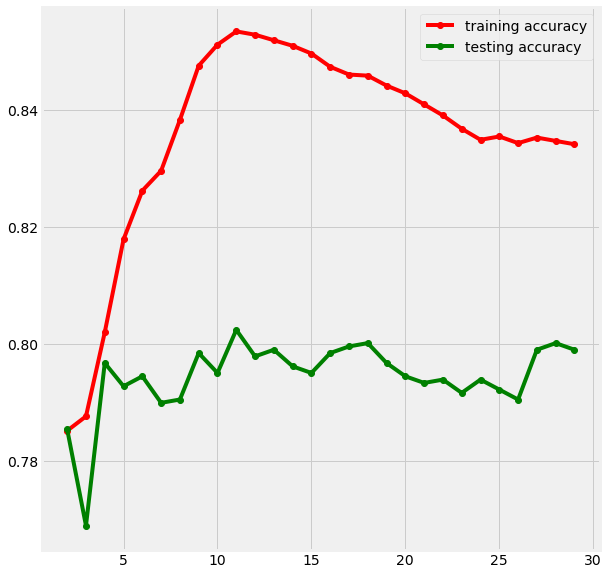

In [87]:
plt.figure(figsize=[10,10])
plt.style.use('fivethirtyeight')
plt.plot(values1,train_predictions1,color="red",marker="o",label="training accuracy")
plt.plot(values1,test_predictions1,color="green",marker="o",label="testing accuracy")
plt.legend()

In [128]:
values1 = []
train_predictions1 = []
test_predictions1 = []
for i in range(2,30):
    model2 = DecisionTreeClassifier(max_depth=11,min_samples_split=11,min_samples_leaf=11,
                                    random_state=i,)
    model2.fit(x_train,y_train)
    train_predictions1.append(model2.score(x_train,y_train))
    test_predictions1.append(model2.score(x_test,y_test))
    values1.append(i)

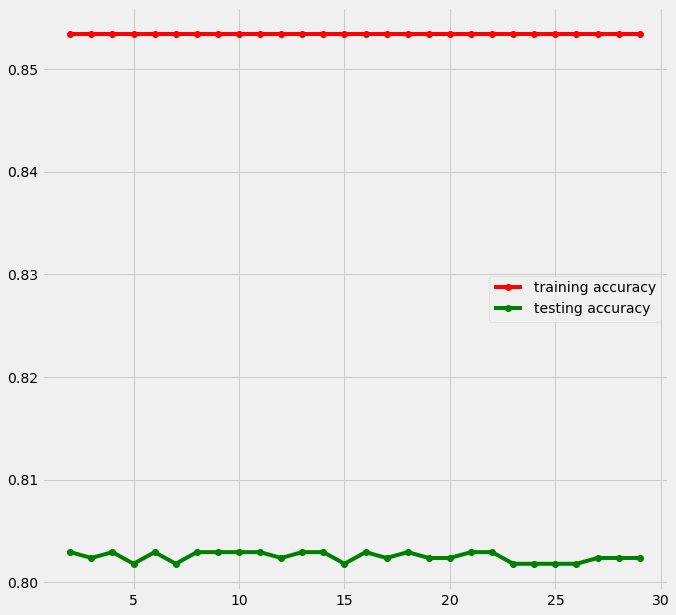

In [129]:
plt.figure(figsize=[10,10])
plt.style.use('fivethirtyeight')
plt.plot(values1,train_predictions1,color="red",marker="o",label="training accuracy")
plt.plot(values1,test_predictions1,color="green",marker="o",label="testing accuracy")
plt.legend()

In [130]:
values1 = []
train_predictions1 = []
test_predictions1 = []
for i in range(2,30):
    model2 = DecisionTreeClassifier(max_depth=11,min_samples_split=11,min_samples_leaf=11,
                                    max_leaf_nodes=i,)
    model2.fit(x_train,y_train)
    train_predictions1.append(model2.score(x_train,y_train))
    test_predictions1.append(model2.score(x_test,y_test))
    values1.append(i)

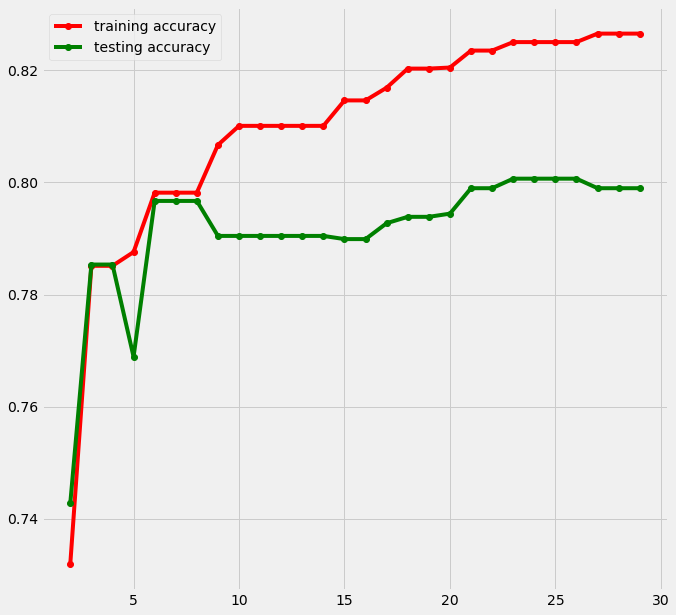

In [131]:
plt.figure(figsize=[10,10])
plt.style.use('fivethirtyeight')
plt.plot(values1,train_predictions1,color="red",marker="o",label="training accuracy")
plt.plot(values1,test_predictions1,color="green",marker="o",label="testing accuracy")
plt.legend()

# from all the observations that i have made i found that these are the best parametres for my model

In [135]:
model3 = DecisionTreeClassifier(max_depth=11,min_samples_split=11,min_samples_leaf=11,random_state=17)
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=11,
                       random_state=17)

In [136]:
model3.score(x_train,y_train)

0.8534645967436577

In [137]:
model3.score(x_test,y_test)

0.8023850085178875

In [138]:
train_predict = model3.predict(x_train)
test_predict = model3.predict(x_test)

In [140]:
#training set classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3866
           1       0.75      0.68      0.71      1416

    accuracy                           0.85      5282
   macro avg       0.82      0.80      0.81      5282
weighted avg       0.85      0.85      0.85      5282



In [141]:
#testing set classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1308
           1       0.62      0.59      0.61       453

    accuracy                           0.80      1761
   macro avg       0.74      0.73      0.74      1761
weighted avg       0.80      0.80      0.80      1761



In [146]:
# training set confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train,train_predict)
matrix

array([[3545,  321],
       [ 453,  963]], dtype=int64)

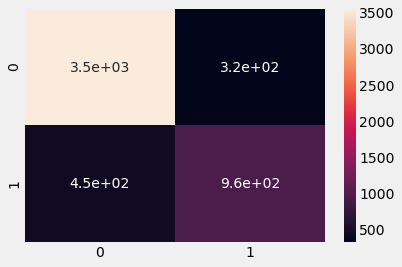

In [151]:
sn.heatmap(matrix,annot=True)

In [148]:
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(y_test,test_predict)
matrix1

array([[1145,  163],
       [ 185,  268]], dtype=int64)

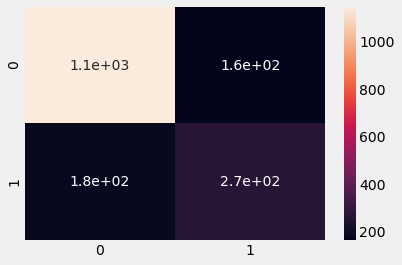

In [150]:
sn.heatmap(matrix1,annot=True)

## lets try our model with a new training data set